<a href="https://colab.research.google.com/github/GaneshiUmayangana/Deep-Learning-Mini-Project-01/blob/main/200064500089_MiniProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mini Project 01 - I.G.Ganeshi Umayangana

In [ ]:
import numpy as np
import pandas as pd
import random
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import numpy as np
from sklearn.model_selection import train_test_split


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
os.chdir("/content/drive/My Drive/Colab_Data_Files/Sinhala_Letter/")
os.getcwd()

'/content/drive/My Drive/Colab_Data_Files/Sinhala_Letter'

In [ ]:
path = '/content/drive/My Drive/Colab_Data_Files/Sinhala_Letter'
files = os.listdir(path)
categories = []

for filename in files:
  category = filename[:2]
  if category == 'na':
    categories.append(1)
  elif category == 'ta':
    categories.append(0)
  else:
    categories.append(2) # Assign a default category for other files

In [ ]:
df = pd.DataFrame({
    'filename':files,
    'category':categories
    })


In [ ]:
df

,filename,category
0,na41.png,1
1,na20.png,1
2,na27.png,1
3,na36.png,1
4,na30.png,1
...,...,...
95,ta24.png,0
96,ta12.png,0
97,ta9.png,0
98,ta10.png,0


In [ ]:
print(len(files))
print(len(category))

100
2


In [ ]:
img = plt.imread('na1.png')

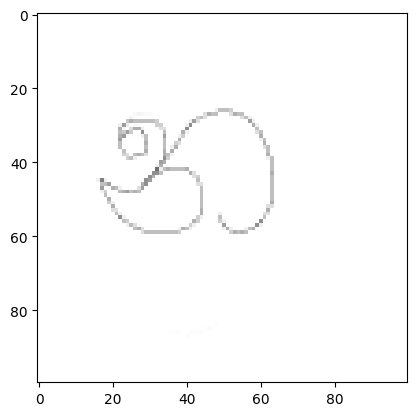

In [ ]:
plt.imshow (img)

In [ ]:
#Load & Preprecess the data
data = []
for index, row in df.iterrows():
    img_path = os.path.join(path, row['filename'])
    img = load_img(img_path, target_size=(100, 100))  # Adjust target_size as needed
    img_array = img_to_array(img)
    img_array /= 255.0  # Normalize pixel values
    data.append(img_array)

x = np.array(data)
y = df['category'].values

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)


# Define and compile CNN model

In [ ]:
model = Sequential([
    Conv2D(32,(3,3), activation ='relu', input_shape = (100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64,activation = 'sigmoid'),
    Dense(1,activation = 'sigmoid')

])


In [ ]:
model.compile(loss='binary_crossentropy',optimizer = 'adam',metrics =['accuracy'])

#Train the model

In [ ]:
model.fit(x_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 0.8090 - accuracy: 0.4500
Epoch 2/5
1/1 [==============================] - 1s 595ms/step - loss: 1.6664 - accuracy: 0.5500
Epoch 3/5
1/1 [==============================] - 1s 562ms/step - loss: 1.6825 - accuracy: 0.5500
Epoch 4/5
1/1 [==============================] - 1s 577ms/step - loss: 1.4523 - accuracy: 0.5500
Epoch 5/5
1/1 [==============================] - 1s 569ms/step - loss: 0.9789 - accuracy: 0.5500


#Model Evalution

In [ ]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 27ms/step - loss: 0.6912 - accuracy: 0.4250


[0.6912442445755005, 0.42500001192092896]

#Testing Sample Data

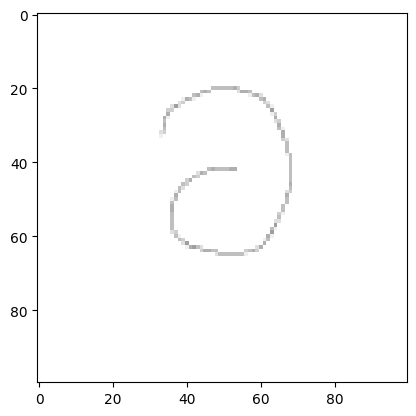

1/1 [==============================] - 0s 75ms/step
Our model says the letter is: ta


In [ ]:
idx2 = random.randint(0, len(y_test) - 1)
plt.imshow(x_test[idx2])
plt.show()

# Make a prediction
y_pred = model.predict(x_test[idx2].reshape(1, 100, 100, 3))
prediction_threshold = 0.5
#print(y_pred)

# Check the predicted class
if y_pred[0, 0] > prediction_threshold:
    pred = 'na'
else:
    pred = 'ta'



# Display the true label
true_label = 'na' if y_test[idx2] == 1 else 'ta'
print("Our model says the letter is:", true_label)

#Test Accuracy

In [ ]:
# Evaluate the model on the test set
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predictions on the entire test set
y_pred = model.predict(x_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Evaluate and print performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred_binary))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_binary))
print("Classification Report:\n", classification_report(y_test, y_pred_binary))


2/2 [==============================] - 0s 25ms/step
Accuracy: 0.425
Confusion Matrix:
 [[17  0]
 [23  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.42      1.00      0.60        17
           1       0.00      0.00      0.00        23

    accuracy                           0.42        40
   macro avg       0.21      0.50      0.30        40
weighted avg       0.18      0.42      0.25        40



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
